# Cat Dog Image Classification

This project uses Tensorflow 2.0 and Keras to create a convolutional neural network that correctly classifies images of cats and dogs at least 63% of the time.

https://towardsdatascience.com/easy-image-classification-with-tensorflow-2-0-f734fee52d13
https://colab.research.google.com/drive/15Cyy2H7nT40sGR7TBN5wBvgTd57mVKay?usp=sharing

In [64]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

import PIL
import pathlib

In [2]:
# This is not working. Getting 403 code. Try wget instead.
#URL = 'https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip'
#path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=URL, extract=True)

In [ ]:

!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip


In [6]:
cwd = os.getcwd()
print(cwd)

/home/chaudha4/Projects/pyprojects/ML-Classify-Cats-Dogs


In [7]:
# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats"

train_dir = os.path.join(cwd, 'cats_and_dogs/train')
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])

print(f"Total number of Training Images {total_train}")

Total number of Training Images 2001


In [4]:
!ls $train_dir

cats  dogs


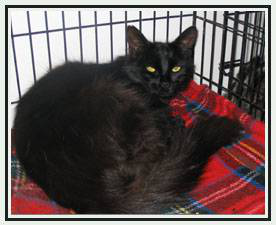

In [9]:
temp_dir = pathlib.Path(train_dir)
cats = list(temp_dir.glob('cats/*'))
PIL.Image.open(str(cats[0]))

In [10]:
validation_dir = os.path.join(cwd, 'cats_and_dogs/validation')
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
print(total_val)

1001


In [11]:
test_dir = os.path.join(cwd, 'cats_and_dogs/test')
total_test = len(os.listdir(test_dir))
print(total_test)

51


In [12]:
!pwd

/home/chaudha4/Projects/pyprojects/ML-Classify-Cats-Dogs


In [13]:
# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [14]:
# Notice that the test directory does not have any sub-directory cats/dogs. 

!ls $test_dir

10.jpg	15.jpg	1.jpg	24.jpg	29.jpg	33.jpg	38.jpg	42.jpg	47.jpg	5.jpg
11.jpg	16.jpg	20.jpg	25.jpg	2.jpg	34.jpg	39.jpg	43.jpg	48.jpg	6.jpg
12.jpg	17.jpg	21.jpg	26.jpg	30.jpg	35.jpg	3.jpg	44.jpg	49.jpg	7.jpg
13.jpg	18.jpg	22.jpg	27.jpg	31.jpg	36.jpg	40.jpg	45.jpg	4.jpg	8.jpg
14.jpg	19.jpg	23.jpg	28.jpg	32.jpg	37.jpg	41.jpg	46.jpg	50.jpg	9.jpg


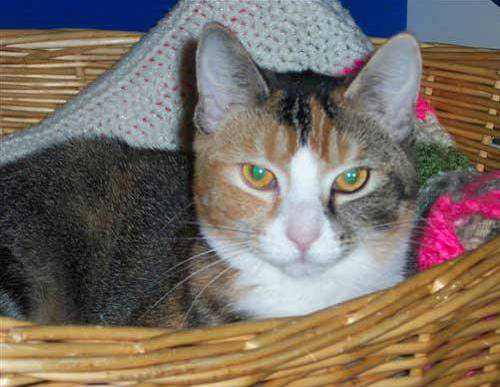

In [15]:
temp_dir = pathlib.Path(test_dir)
catsordogs = list(temp_dir.glob('*'))
PIL.Image.open(str(catsordogs[3]))

In [16]:
!ls $validation_dir

cats  dogs


## Set up Image Generators

Create image generators for each of the three image data sets (train, validation, test) using `ImageDataGenerator` to read / decode the images and convert them into floating point tensors. Use the `rescale` argument  to rescale the tensors from values between 0 and 255 to values between 0 and 1.

For the `*_data_gen` variables, use the `flow_from_directory` method. Pass in the batch size, directory, target size (`(IMG_HEIGHT, IMG_WIDTH)`), class mode, and anything else required. `test_data_gen` will be the trickiest one. For `test_data_gen`, make sure to pass in `shuffle=False` to the `flow_from_directory` method. This will make sure the final predictions stay is in the order that our test expects. For `test_data_gen` it will also be helpful to observe the directory structure.


After you run the code, the output should look like this:
```
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.
```

### Keras models accept three types of inputs:

1. NumPy arrays, just like Scikit-Learn and many other Python-based libraries. This is a good option if your data fits in memory.  
  
1. TensorFlow Dataset objects. This is a high-performance option that is more suitable for datasets that do not fit in memory and that are streamed from disk or from a distributed filesystem. **We use this for our Project**
  
1. Python generators that yield batches of data (such as custom subclasses of the keras.utils.Sequence class).

## Training Image

For API reference -  https://keras.io/api/preprocessing/image/#flowfromdirectory-method

In [17]:
train_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [26]:
# A DirectoryIterator yielding tuples of (x, y) where x is a numpy array containing a batch of 
# images with shape (batch_size, *target_size, channels) and y is a numpy array of corresponding labels.

for x, y in train_data_gen:
    print(x.shape, x.dtype, x.ndim, x.size)
    print(y.shape, y.dtype, y.ndim, y.size)
    print(x[1,2,3])
    break

(128, 150, 150, 3) float32 4 8640000
(128,) float32 1 128
[0.81568635 0.8196079  0.8000001 ]


## Validation Image

For API reference -  https://keras.io/api/preprocessing/image/#flowfromdirectory-method

In [28]:
validation_image_generator = ImageDataGenerator(rescale=1./255)

val_data_gen = validation_image_generator.flow_from_directory(
    directory = validation_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [29]:
test_dir_top = os.path.join(cwd, 'cats_and_dogs')
! ls $test_dir_top

test_image_generator = ImageDataGenerator(rescale=1./255)

test_data_gen = test_image_generator.flow_from_directory(
    directory = test_dir_top,
    classes = ['test'],   # Will look for a "test" sub-directory only.
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = 1,
    shuffle=False,
    class_mode=None)

test  train  validation
Found 50 images belonging to 1 classes.


The `plotImages` function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional. This code is given to you. If you created the `train_data_gen` variable correctly, then running the cell below will plot five random training images.

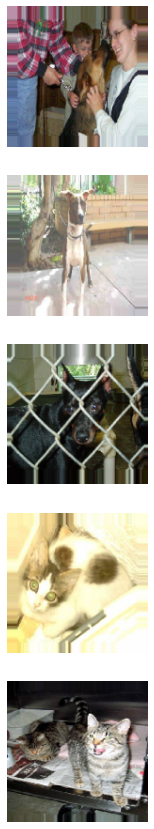

In [32]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


## Create more training data

Since there are a small number of training examples there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.

Recreate the `train_image_generator` using `ImageDataGenerator`. Add 4-6 random transformations as arguments to `ImageDataGenerator`. Make sure to rescale the same as before.


In [33]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,    #Randomly flip inputs horizontally
    zoom_range=.25,          #Range for random zoom
    channel_shift_range=.4,  #Range for random channel shifts
    height_shift_range=2,
    width_shift_range=1,
    featurewise_center=True,
    
)


Let's create `train_data_gen` gain but with the new `train_image_generator`. Then, a single image is plotted five different times using different variations.

Found 2000 images belonging to 2 classes.


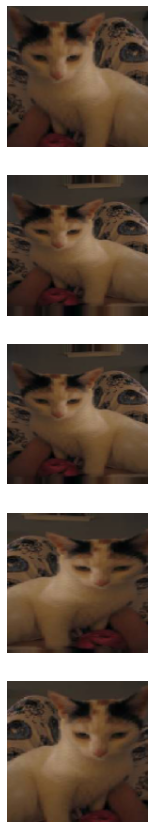

In [34]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

## Create a Model


We create a model for the neural network that outputs class probabilities. It uses the Keras Sequential model, with a stack of Conv2D and MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.

Compile the model passing the arguments to set the optimizer and loss. Also pass in `metrics=['accuracy']` to view training and validation accuracy for each training epoch.

### The Sequential model

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [49]:
# Define Sequential model
model = Sequential()

# Add layers

# First Layer - 2D convolution layer. When using this layer as the first layer in a model, 
# provide the keyword argument input_shape (3 indicates RGB)
model.add(Conv2D(16, # filters -  number of output filters in the convolution
                 3,  # kernel_size - height and width of the 2D convolution window.
                 padding='same', 
                 activation='relu', # rectified linear unit activation function
                 input_shape=(IMG_HEIGHT,IMG_WIDTH,3)
                ))

# Add Pooling layer
model.add(MaxPooling2D())
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


In [50]:
# a stack of Conv2D and MaxPooling2D layers is downsampling image feature maps:
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 64)        0         
Total params: 23,584
Trainable params: 23,584
Non-trainable params: 0
__________________________________________________

In [51]:
# Flatten layer - Flattens the input. Does not affect the batch size.
model.add(Flatten())
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)            

In [52]:
# Dense layer - 
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  # Final layer - Output should be 1 (a probability in this case)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)            

In [53]:
#Once the model is created, you can config the model with losses and metrics with model.compile()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])





In [54]:
#Train the model for a fixed number of epochs (iterations on a dataset).

history = None

epochs=10
history = model.fit(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=epochs
)

/home/chaudha4/.local/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
16/16 [==============================] - 40s 2s/step - loss: 0.7398 - accuracy: 0.5090 - val_loss: 0.6913 - val_accuracy: 0.5320
Epoch 2/10
16/16 [==============================] - 41s 3s/step - loss: 0.6873 - accuracy: 0.5490 - val_loss: 0.6786 - val_accuracy: 0.5490
Epoch 3/10
16/16 [==============================] - 42s 3s/step - loss: 0.6619 - accuracy: 0.5965 - val_loss: 0.7038 - val_accuracy: 0.5270
Epoch 4/10
16/16 [==============================] - 41s 3s/step - loss: 0.6483 - accuracy: 0.6090 - val_loss: 0.6443 - val_accuracy: 0.6310
Epoch 5/10
16/16 [==============================] - 39s 2s/step - loss: 0.6101 - accuracy: 0.6780 - val_loss: 0.5882 - val_accuracy: 0.6830
Epoch 6/10
16/16 [==============================] - 39s 2s/step - loss: 0.5765 - accuracy: 0.6985 - val_loss: 0.5803 - val_accuracy: 0.6800
Epoch 7/10
16/16 [==============================] - 38s 2s/step - loss: 0.5840 - accuracy: 0.6980 - val_loss: 0.5798 - val_accuracy: 0.6750
Epoch 8/10
16/16 [==

## Visualize the accuracy and loss of the model.

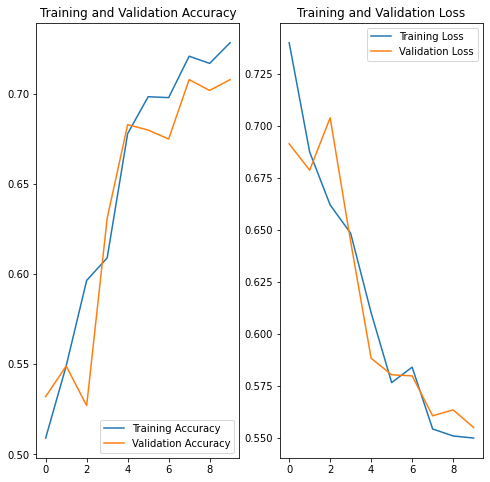

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict using the trained model

Now it is time to use your model to predict whether a brand new image is a cat or a dog.


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


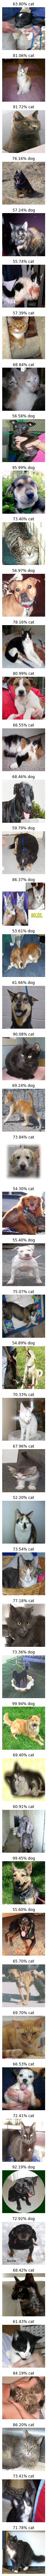

In [56]:
probabilities = model.predict(test_data_gen)
prediction = model.predict_classes(test_data_gen)
plotImages([test_data_gen[i][0] for i in range(50)],probabilities=probabilities,)

In [57]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if np.round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 0.78% of the images of cats and dogs.
You passed the challenge!



# Serialization and saving

See https://keras.io/guides/serialization_and_saving/



In [58]:
model.save("cats_dogs_trained_model")


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: cats_dogs_trained_model/assets


In [65]:
# It can be used to reconstruct the model identically.
reconstructed_model = tf.keras.models.load_model("cats_dogs_trained_model")

In [61]:
probabilities = reconstructed_model.predict(test_data_gen)
prediction = reconstructed_model.predict_classes(test_data_gen)

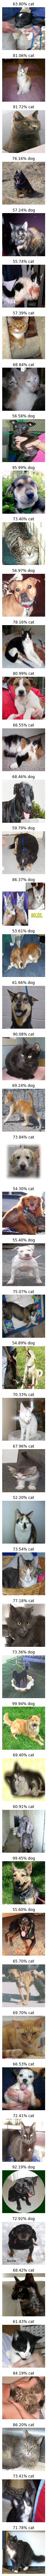

In [62]:
plotImages([test_data_gen[i][0] for i in range(50)],probabilities=probabilities,)

In [63]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if np.round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

model correctly identified 0.78% of the images of cats and dogs.


In [67]:
print(probabilities)

[[0.36198664]
 [0.1894106 ]
 [0.08278868]
 [0.7616458 ]
 [0.572429  ]
 [0.44261277]
 [0.42605254]
 [0.31159243]
 [0.5658469 ]
 [0.9598923 ]
 [0.26595414]
 [0.56965137]
 [0.21842366]
 [0.19011894]
 [0.3345145 ]
 [0.68464625]
 [0.5979234 ]
 [0.8637352 ]
 [0.5360787 ]
 [0.6165843 ]
 [0.09916919]
 [0.69237375]
 [0.26162046]
 [0.4569503 ]
 [0.5540364 ]
 [0.24930814]
 [0.5489268 ]
 [0.2967475 ]
 [0.32036686]
 [0.4779577 ]
 [0.26457357]
 [0.2282263 ]
 [0.7336403 ]
 [0.9993955 ]
 [0.30596444]
 [0.39088908]
 [0.9945103 ]
 [0.55600846]
 [0.34298775]
 [0.30296594]
 [0.33468932]
 [0.2758909 ]
 [0.92189217]
 [0.72916305]
 [0.31580353]
 [0.3856872 ]
 [0.15811116]
 [0.13799262]
 [0.26592487]
 [0.28221178]]
